In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
data = pd.read_csv("data/HepatitisCdata.csv")
data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [87]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [88]:
total_len = len(data)
average_values   = data.mean(numeric_only=True)
numeric_features = data.dtypes[data.dtypes != 'object'].index
object_features  = data.dtypes[data.dtypes == 'object'].index
data_numeric    = data[numeric_features].fillna(average_values)
data[numeric_features] = data_numeric
print(f'training exemples : {len(data)},  {(1-len(data)/total_len)*100:.1f} % data not NaN')
data.head()

training exemples : 615,  0.0 % data not NaN


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [89]:
data.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [90]:
from sklearn.preprocessing import LabelEncoder
data[object_features] = data[object_features].apply(LabelEncoder().fit_transform)
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


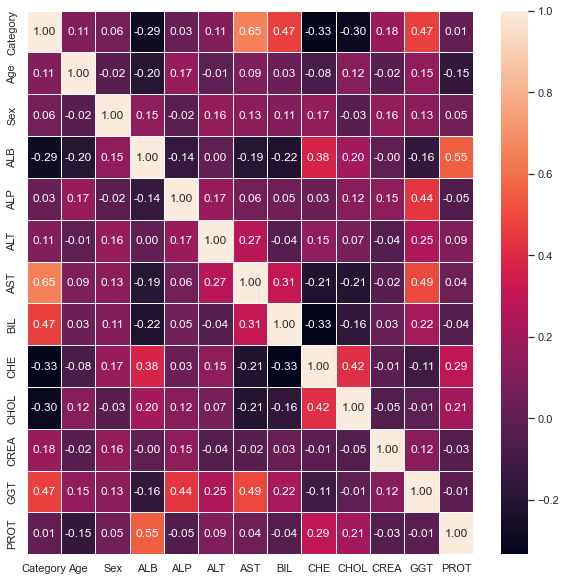

In [91]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidth=0.5,fmt='0.2f')
plt.show()

<AxesSubplot:ylabel='Category'>

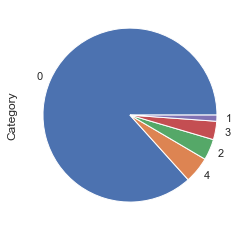

In [92]:
data['Category'].value_counts().plot.pie()

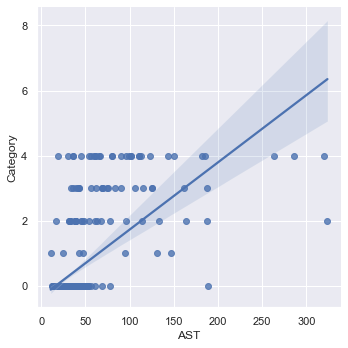

In [93]:
sns.lmplot(x="AST",y="Category",data=data)

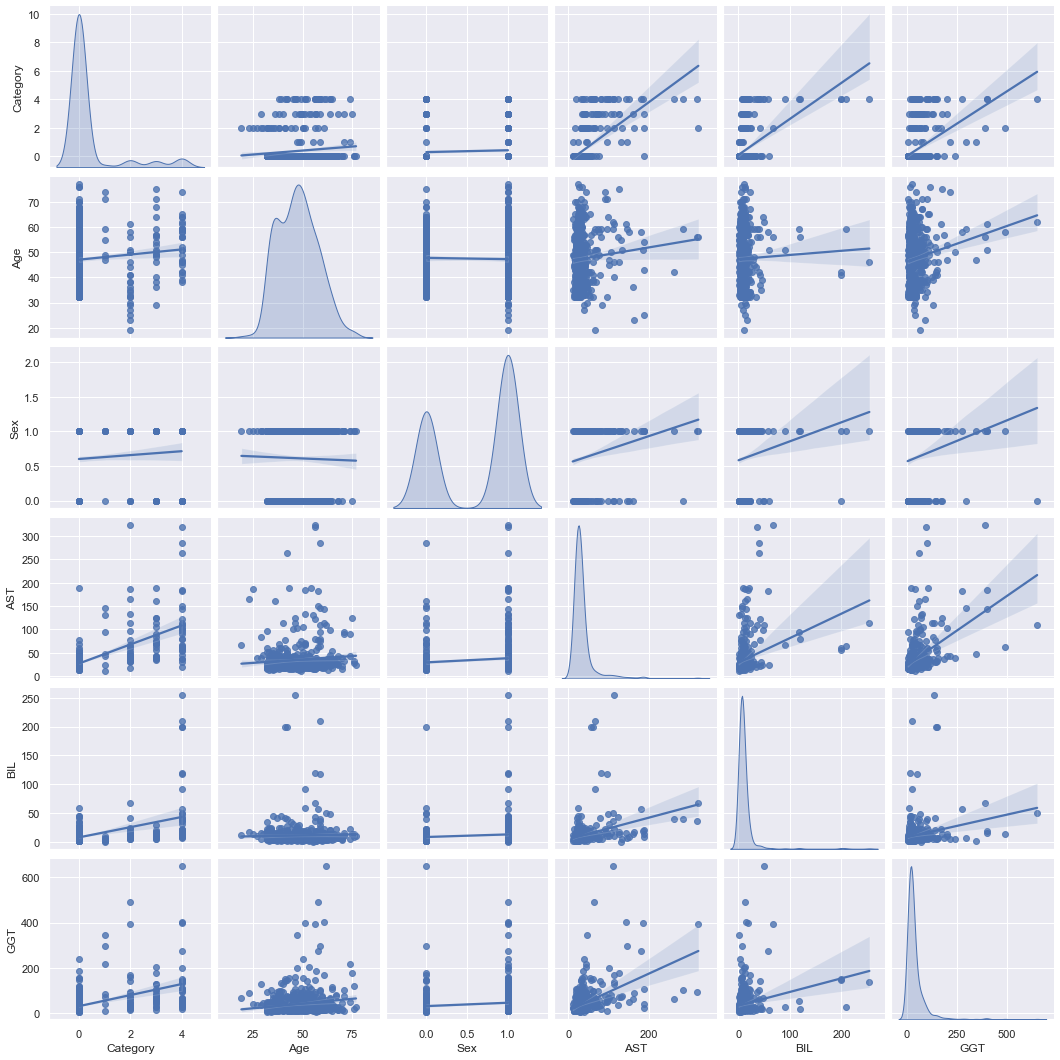

In [94]:
sns.set()
cols = ['Category','Age','Sex', 'AST', 'BIL', 'GGT']
sns.pairplot(data[cols], kind="reg",diag_kind="kde")
plt.show()

In [95]:
from sklearn.model_selection import train_test_split
X = data.drop(labels=["Category"], axis=1)
y = data["Category"]
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [96]:
X_train

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
130,44,1,44.5,93.6,27.5,25.5,5.4,7.79,4.59,108.0,16.7,76.8
488,55,0,36.2,101.3,19.2,21.9,4.9,6.50,5.86,66.0,12.3,70.3
473,53,0,42.4,55.0,20.9,42.4,7.7,6.60,4.26,67.0,14.2,70.9
502,57,0,27.3,85.1,18.4,25.4,2.2,8.96,6.66,68.0,10.2,62.5
371,40,0,39.9,50.2,14.9,20.4,5.1,6.49,4.92,68.0,24.1,72.8
...,...,...,...,...,...,...,...,...,...,...,...,...
292,63,1,40.8,74.3,25.0,27.5,5.5,7.74,6.35,107.0,50.4,69.3
304,66,1,40.6,79.6,27.0,28.0,10.1,10.88,5.48,76.0,29.8,71.8
203,50,1,43.1,73.7,19.0,21.8,2.9,9.45,6.06,91.0,33.3,68.9
133,44,1,44.0,84.3,47.4,31.3,4.1,10.28,5.42,105.0,34.2,75.3


In [97]:
y_train

130    0
488    0
473    0
502    0
371    0
      ..
292    0
304    0
203    0
133    0
101    0
Name: Category, Length: 492, dtype: int32

In [98]:
# choose the right model and hyperparameter 
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()

In [99]:
clf.fit(X_train,y_train);

In [100]:
clf.score(X_train,y_train)

1.0

In [105]:
clf.score(X_test,y_test)

0.9186991869918699

In [106]:
X_test.shape

(123, 12)

In [110]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0,
       4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0])

In [111]:
Age=44
Sex=0 #male=1 female=0
ALB=45.6
ALP=57.6
ALT=21
AST=19.1
BIL=3.7
CHE=10.36
CHOL=6.6800
CREA=74.0
GGT=20.8
PROT=74.4

In [112]:
y_pred=clf.predict([[Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT]])
y_pred

C:\Users\yuvar\OneDrive\Desktop\ML\ML1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [114]:
res=y_pred[0]
if res==0:
    print("Blood Donor")
elif res==1:
    print("suspect Blood Donor")
elif res==2:
    print("Hepatitis")
elif res==3:
    print("Fibrosis")
else:
    print("Cirrhosis")

Blood Donor
